# importing all necessary library


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

!pip install scikit-learn

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Data collection & Analysis

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              201 non-null    int64 
 1   Gender                  201 non-null    object
 2   Age                     201 non-null    int64 
 3   Annual Income (k$)      201 non-null    int64 
 4   Spending Score (1-100)  201 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.0+ KB


In [4]:
df.shape

(201, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,201.000000,201.000000,201.000000,201.000000
mean,101.000000,38.825871,60.646766,50.223881
std,58.167861,13.938240,26.227840,25.761107
min,1.000000,18.000000,15.000000,1.000000
25%,51.000000,29.000000,42.000000,35.000000
50%,101.000000,36.000000,62.000000,50.000000
75%,151.000000,49.000000,78.000000,73.000000
max,201.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.drop(["CustomerID"], axis =1 , inplace = True)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Data Visualisation

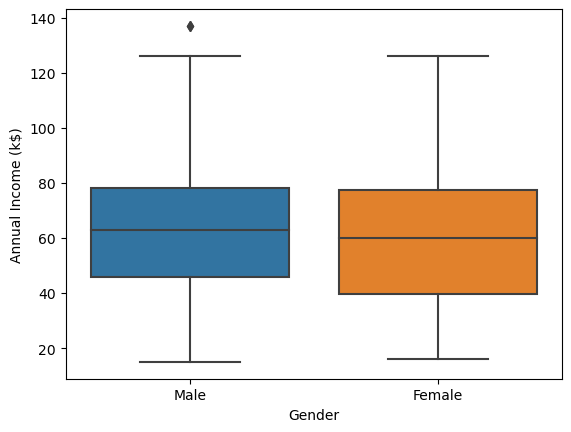

In [10]:
%matplotlib inline
sns.boxplot(x = 'Gender', y = 'Annual Income (k$)', data =df)
plt.show()

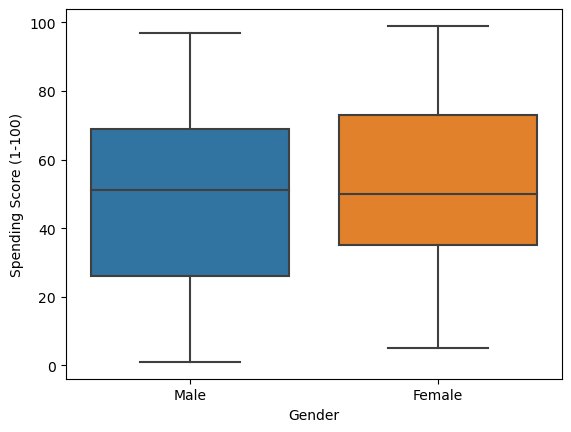

In [11]:
sns.boxplot(y = 'Spending Score (1-100)', x = 'Gender', data =df)
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


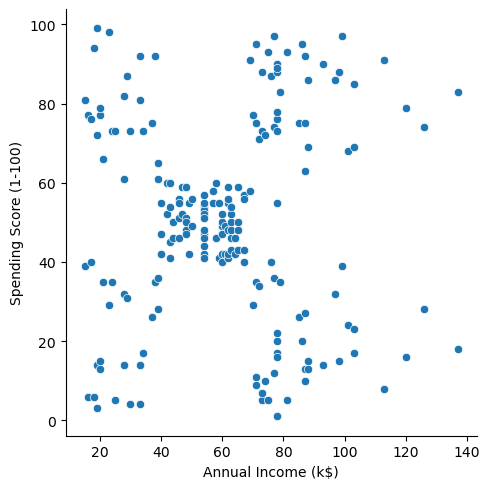

In [12]:
sns.relplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', data = df)

# Clustering 

1. K means



C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

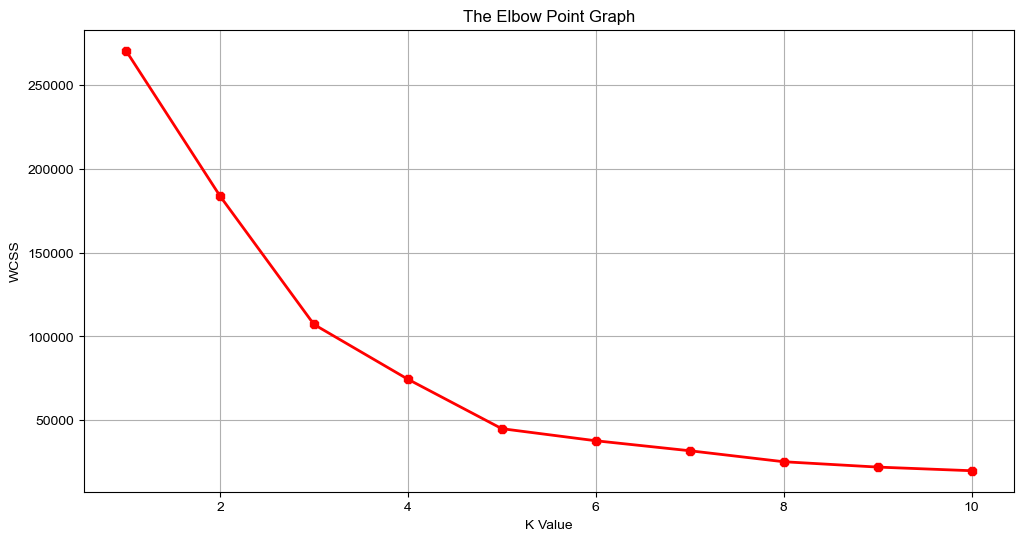

In [13]:
# %matplotlib inline
X1 = df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

wcss =[]

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++" )
    kmeans.fit(X1)
    
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.grid()
       
sns.set()
plt.plot(range(1,11), wcss ,linewidth = 2, color = 'red', marker = '8')
plt.title('The Elbow Point Graph')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 6)
label = kmeans.fit_predict(X1)
print(label)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 5 3 5 1 5 3 5 3 5 1 5 3 5 3 5 3 5 3 5 1 5 3 5 3 5
 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1]


In [15]:
print(kmeans.cluster_centers_)

[[108.18181818  82.72727273]
 [ 55.57317073  49.58536585]
 [ 25.72727273  79.36363636]
 [ 88.2         17.11428571]
 [ 26.30434783  20.91304348]
 [ 78.03571429  81.89285714]]


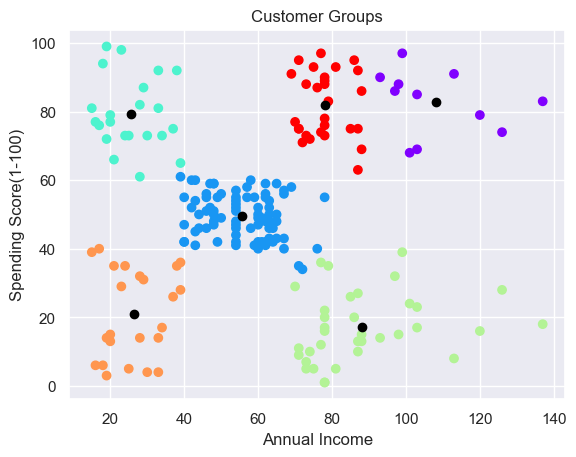

In [16]:
# plt.figure(figsize=(8,8))
plt.scatter(X1[:,0], X1[:, 1], c=kmeans.labels_, cmap = 'rainbow')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

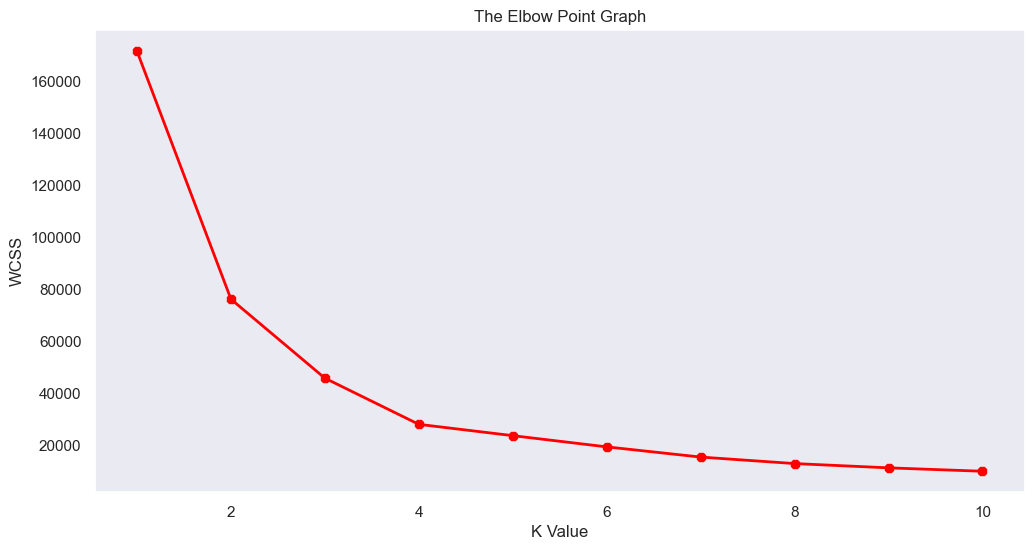

In [17]:
X2 = df.loc[:,["Age","Spending Score (1-100)"]].values

wcss =[]

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++" )
    kmeans.fit(X2)
    
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.grid()
       
sns.set()
plt.plot(range(1,11), wcss ,linewidth = 2, color = 'red', marker = '8')
plt.title('The Elbow Point Graph')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 6)
label = kmeans.fit_predict(X2)
print(label)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 1 0 1 3 1 0 1 4 1 4 1 4 1 0 1 5 3 4 1 5 1 4 1 4 1 5 3 5 1 4 1 4 1 4 1 4
 1 0 1 2 1 5 3 4 3 5 3 3 3 5 3 3 2 5 5 5 2 3 5 2 3 2 2 2 3 5 2 3 3 2 5 2 2
 2 3 5 5 3 5 2 5 2 5 3 5 2 3 3 5 2 3 5 5 3 3 5 3 5 3 3 5 2 3 5 3 2 5 2 2 2
 3 5 3 3 3 2 5 5 5 3 5 5 1 0 1 5 1 4 1 4 1 3 1 0 1 4 1 0 1 4 1 3 1 0 1 5 1
 0 1 4 1 4 1 4 1 0 1 0 1 5 1 0 1 4 1 4 1 0 3 0 1 0 1 4 1 4 1 4 1 5 1 4 1 5
 1 4 1 4 1 0 1 0 1 4 1 4 1 0 1 3]


In [19]:
print(kmeans.cluster_centers_)

[[30.55555556 13.05555556]
 [30.1754386  82.35087719]
 [63.90909091 50.63636364]
 [25.36842105 51.15789474]
 [51.03571429 15.        ]
 [45.65789474 44.42105263]]


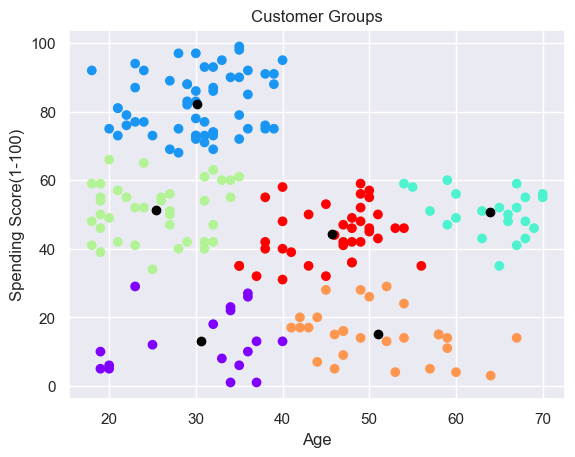

In [20]:
# plt.figure(figsize=(8,8))
plt.scatter(X2[:,0], X2[:, 1], c=kmeans.labels_, cmap = 'rainbow')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

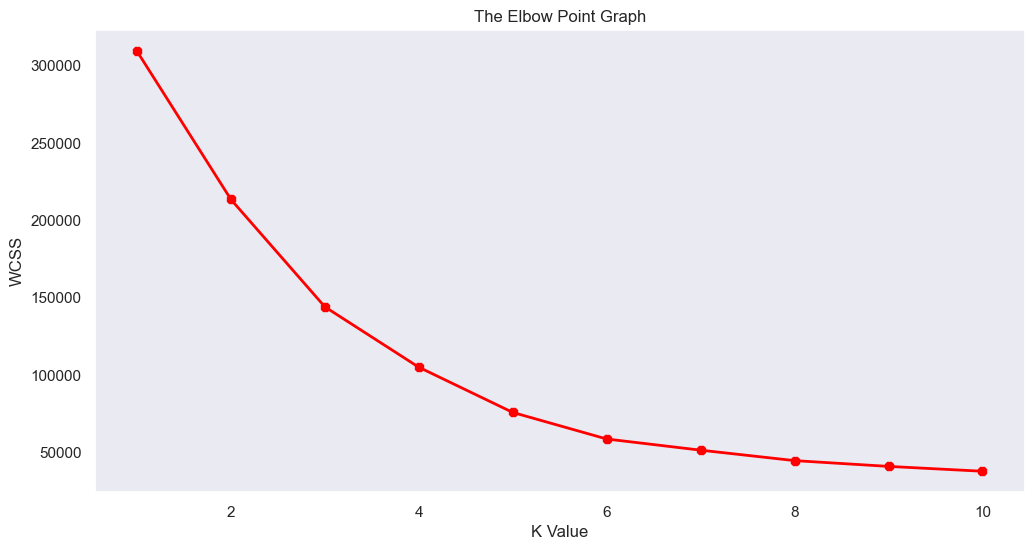

In [21]:
X3 = df.iloc[:,1:]
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++" )
    kmeans.fit(X3)
    
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.grid()
       
sns.set()
plt.plot(range(1,11), wcss ,linewidth = 2, color = 'red', marker = '8')
plt.title('The Elbow Point Graph')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 6)
label = kmeans.fit_predict(X3)
print(label)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5
 3 5 3 0 3 0 4 5 3 0 4 4 4 0 4 4 0 0 0 0 0 4 0 0 4 0 0 0 4 0 0 4 4 0 0 0 0
 0 4 0 4 4 0 0 4 0 0 4 0 0 4 4 0 0 4 0 4 4 4 0 4 0 4 4 0 0 4 0 4 0 0 0 0 0
 4 4 4 4 4 0 0 0 0 4 4 4 1 4 1 2 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 4]


In [23]:
print(kmeans.cluster_centers_)

[[56.15555556 53.37777778 49.08888889]
 [32.69230769 86.53846154 82.12820513]
 [41.68571429 88.22857143 17.28571429]
 [25.27272727 25.72727273 79.36363636]
 [27.17948718 57.20512821 49.28205128]
 [44.14285714 25.14285714 19.52380952]]


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


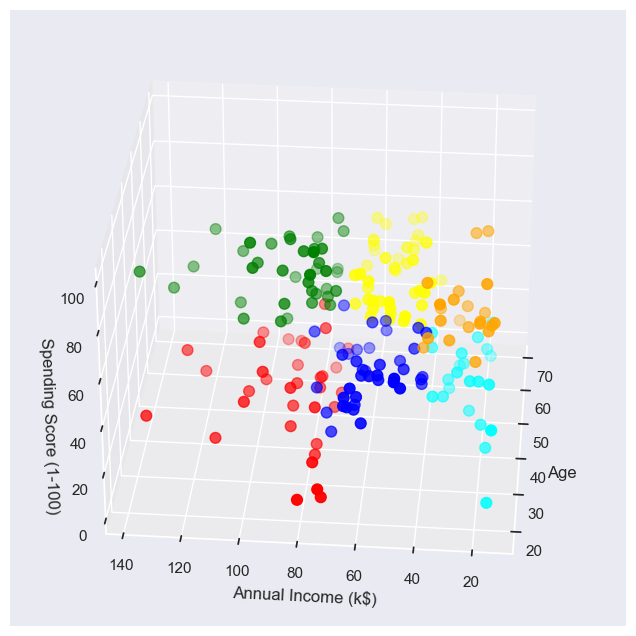

In [24]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters



fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection ='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"] [df.label ==0],df["Spending Score (1-100)"][df.label ==0], c='blue',s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"] [df.label ==1],df["Spending Score (1-100)"][df.label ==1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"] [df.label ==2],df["Spending Score (1-100)"][df.label ==2], c='green',s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"] [df.label ==3],df["Spending Score (1-100)"][df.label ==3], c='yellow',s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"] [df.label ==4],df["Spending Score (1-100)"][df.label ==4], c='cyan', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"] [df.label ==5],df["Spending Score (1-100)"][df.label ==5], c='orange',s=60)

ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

ax.set_zlabel("Spending Score (1-100)")

plt.show()

